# Homework 5: Systems of equations and optimization
ENVR 890-001: Python for Environmental Research, Fall 2020

By Andrew Hamilton. 

### Problem context
Consider an idealized power market, consisting of buyers and sellers of electricity. Assume the demand curve describing the behavior of buyers can be written as the following equation for marginal net benefits:

$$MNB_d = 1000 - 20 q_d - p$$

where the marginal net benefit $MNB_d$ (in \\$/MWh) gives the value to buyers of the $q_d$th MWh of electricity purchased at price $p$. Additionally, we have three supply curves, giving the aggregated marginal net benefits for sellers of power from coal ($MNB_c$), natural gas ($MNB_g$), and renewable ($MNB_r$) energy sources. Each source of power is assumed to sell into the same market, so they all recieve the price $p$.

\begin{align}
MNB_c &= p - 20 - 0.2 q_c \\
MNB_g &= p - 5 - q_g \\
MNB_r &= p - 2 q_r
\end{align}

(0, 120)

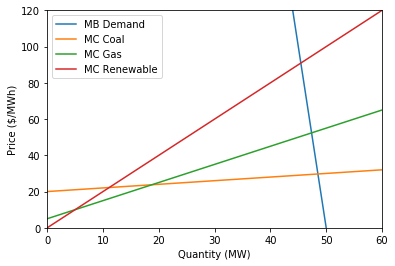

In [1]:
### set up and plot demand and supply curves
import numpy as np
import matplotlib.pyplot as plt

demand = (1000, -20)
coal = (20, 0.2, 0)
gas = (5, 1, 0)
renew = (0, 2., 0)

def mb_demand(q):
    return demand[0] + demand[1] * q

def mc_coal(q):
    return coal[0]  + coal[1] * q

def mc_gas(q):
    return gas[0] + gas[1] * q

def mc_renew(q):
    return renew[0] + renew[1] * q

q_grid = np.arange(0, 200)
plt.plot(q_grid, [mb_demand(q) for q in q_grid])
plt.plot(q_grid, [mc_coal(q) for q in q_grid])
plt.plot(q_grid, [mc_gas(q) for q in q_grid])
plt.plot(q_grid, [mc_renew(q) for q in q_grid])
plt.legend(['MB Demand', 'MC Coal', 'MC Gas', 'MC Renewable'])
plt.xlabel('Quantity (MW)')
plt.ylabel('Price ($/MWh)')
plt.xlim([0, 60])
plt.ylim([0, 120])

### Solving systems of equations
We have five unknowns: the four quantities plus the price. We know that the marginal net benefits for each party should be zero. We also know that the total power demanded should be equal to the sum of the supplies. This gives us five unknowns and five equations:

\begin{align}
MNB_d &= 0 \\
MNB_c &= 0 \\
MNB_g &= 0 \\
MNB_r &= 0 \\
q_d &= q_c + q_g + q_r
\end{align}

Filling in the equations, we have:

\begin{align}
1000 - 20 q_d - p &= 0 \\
p - 20 - 0.2 q_c &= 0 \\
p - 5 - q_g &= 0 \\
p - 2 q_r &= 0 \\
q_d &= q_c + q_g + q_r
\end{align}

And now separating variables from constants, we get:

\begin{align}
20 q_d + 0 q_c + 0 q_g + 0 q_r + 1 p &= 1000 \\
0 q_d - 0.2 q_c + 0 q_g + 0 q_r + 1 p &= 20 \\
0 q_d + 0 q_c - 1 q_g + 0 q_r + 1 p &= 5 \\
0 q_d + 0 q_c + 0 q_g - 2 q_r + 1 p &= 0 \\
1 q_d - 1 q_c - 1 q_g - 1 q_r + 0 p&= 0
\end{align}

**1) Use the Numpy ``linalg`` solution method from class to find the 4 $q$'s.**

**2) What will the price of power be?**

### Constrained optimization
As an alternative solution method, we will now maximize total net benefits. First, we need to integrate each marginal net benefit function:
\begin{align}
NB_d &= \int_0^{q_d} (1000 - 20 q - p) dq = (1000 - p) q_d - 10 q_d^2 \\
NB_c &= \int_0^{q_c} (p - 20 - 0.2 q) dq = (p - 20) q_c - 0.1 q_c^2 \\
NB_g &= \int_0^{q_g} (p - 5 - q) dq = (p - 5) q_g - 0.5 q_g^2\\
NB_r &= \int_0^{q_r} (p - 2 q) dq = p q_r - q_r^2\\
\end{align}

Now we want to maximize the total sum of net benefits across both buyers and sellers:

\begin{align}
NB &= NB_d + NB_c + NB_g + NB_r \\
   &= (1000 - p) q_d - 10 q_d^2 + (p - 20) q_c - 0.1 q_c^2 + (p - 5) q_g - 0.5 q_g^2 + p q_r - q_r^2 \\
\end{align}

subject to two linear constraints (one to enforce that supply equals demand, one to enforce that the price is correct based on the demand function):
\begin{align}
1 q_d - 1 q_c - 1 q_g - 1 q_r + 0 p&= 0 \\
20 q_d + 0 q_c + 0 q_g + 0 q_r + 1 p &= 1000
\end{align}

**3) Use the ``minimize`` function from ``scipy.optimize`` to find the $q$'s that maximize net benefits, and the resulting price. You should get the same answers (within rounding error) as problems 1-2.**

In [ ]:
## Hint: this is how you write the equality constraint, q_d - q_c - q_g - q_r = 0.
## You will need to add the second equality constraint to this function
linear_constraint = LinearConstraint([1, -1, -1, -1], 0, 0)

**4) Repeat again, but using the ``quad`` function from the ``scipy.integrate`` module to automate the integration of the marginal net benefits functions. You should again get the same answers.**

### Reducing carbon emissions with different interventions
Now we will make four simple alterations to model the effects of eletricity demand reductions, a carbon tax, a carbon cap, and a renewable portfolio standard. **For each of the three alterations below, answer the following questions. Perform each alteration independently, starting over from the benchline case of question (4)**.

    a) How does this affect the amount of electricity produced using coal, gas, and renewables?

    b) How does it affect total electricity demand? 

    c) How does it affect the price of electricity?

**5) Assume a 10% leftward shift in the demand curve for electricity, due to higher efficiency consumer products.**
This will affect the marginal net benefit function for demand:
$$MNB_d = 900 - 20 q_d - p$$


#### 6) Add a carbon tax that results in an increase of \\$10/MWh for coal-powered electricity and \\$5/MWh for natural gas-powered electricity. 
This will affect the marginal net benefit functions for the suppliers:

\begin{align}
MNB_c &= p - 30 - 0.2 q_c \\
MNB_g &= p - 10 - q_g \\
MNB_r &= p - 2 q_r
\end{align}

#### 7) Add a carbon cap of 10,000 lb CO2 for this system, assuming that coal-fired electricity produces 735 lb/MWh and gas-fired electricity produces 400 lb/MWh. 
This will add a new linear constraint:
$$ 735 q_c + 400 q_g \leq 10,000$$

#### 8) Add a renewable portfolio standard which mandates that at least 20 MWh must come from renewables. 
This will change the Bounds that we use for $q_r$ (note: you could also do it with another LinearConstraint, but the Bounds are simpler):
$$ 20 \leq q_r$$